In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"C:\Users\abdul\OneDrive\Document\Rainfall Prediction\Rainfall.csv")
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
data.rename(columns = {"         winddirection":"winddirection"}, inplace=True) 

In [7]:
data.rename(columns = {"pressure ":"pressure"}, inplace=True)
data.rename(columns = {"cloud ":"cloud"}, inplace=True)
data.rename(columns = {"humidity ":"humidity"}, inplace=True)

In [8]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [9]:
data.replace({"rainfall": {"yes":1, "no": 0}}, inplace=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_17920\812814852.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"rainfall": {"yes":1, "no": 0}}, inplace=True)


In [10]:
data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    int64  
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 34.4 KB


In [12]:
data_rainfall = data.pop("rainfall")
data["Rainfall"] = data_rainfall

In [13]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1


<Axes: xlabel='Rainfall', ylabel='count'>

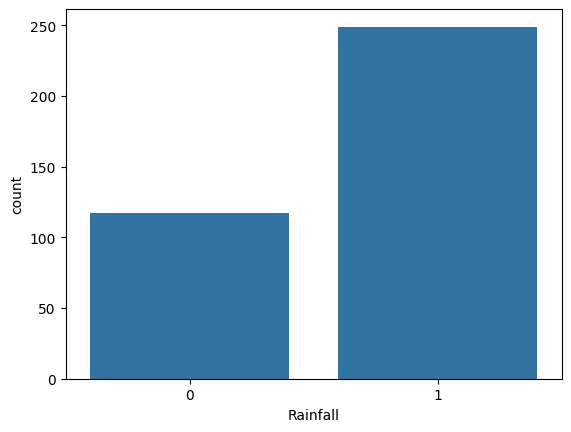

In [14]:
sns.countplot(x="Rainfall", data=data)

<Axes: >

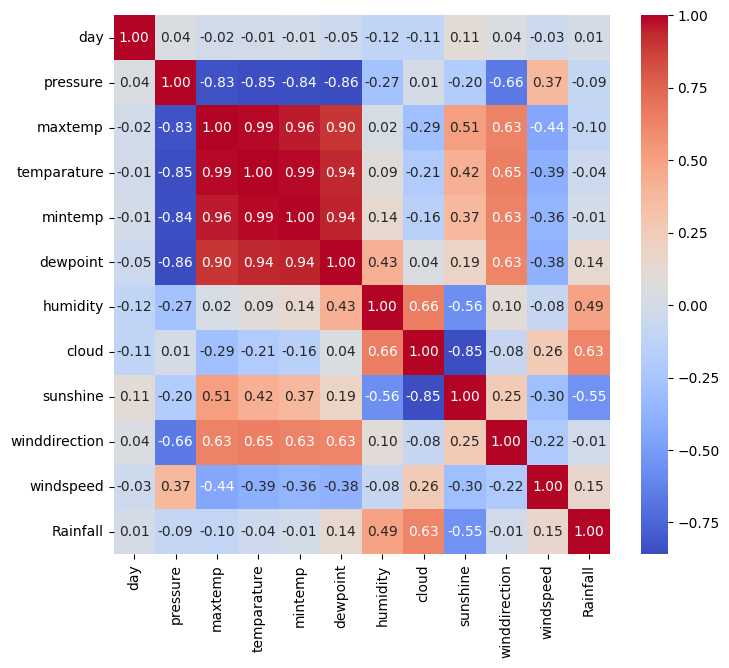

In [15]:
data_corr = data.corr("pearson", numeric_only=True)
plt.figure(figsize=(8,7))
sns.heatmap(data_corr, cmap = "coolwarm", annot = True, fmt = ".2f")

In [16]:
data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        1
Rainfall         0
dtype: int64

In [17]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [18]:
data["windspeed"].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [19]:
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].mean())

In [20]:
data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
Rainfall         0
dtype: int64

In [21]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'Rainfall'],
      dtype='object')

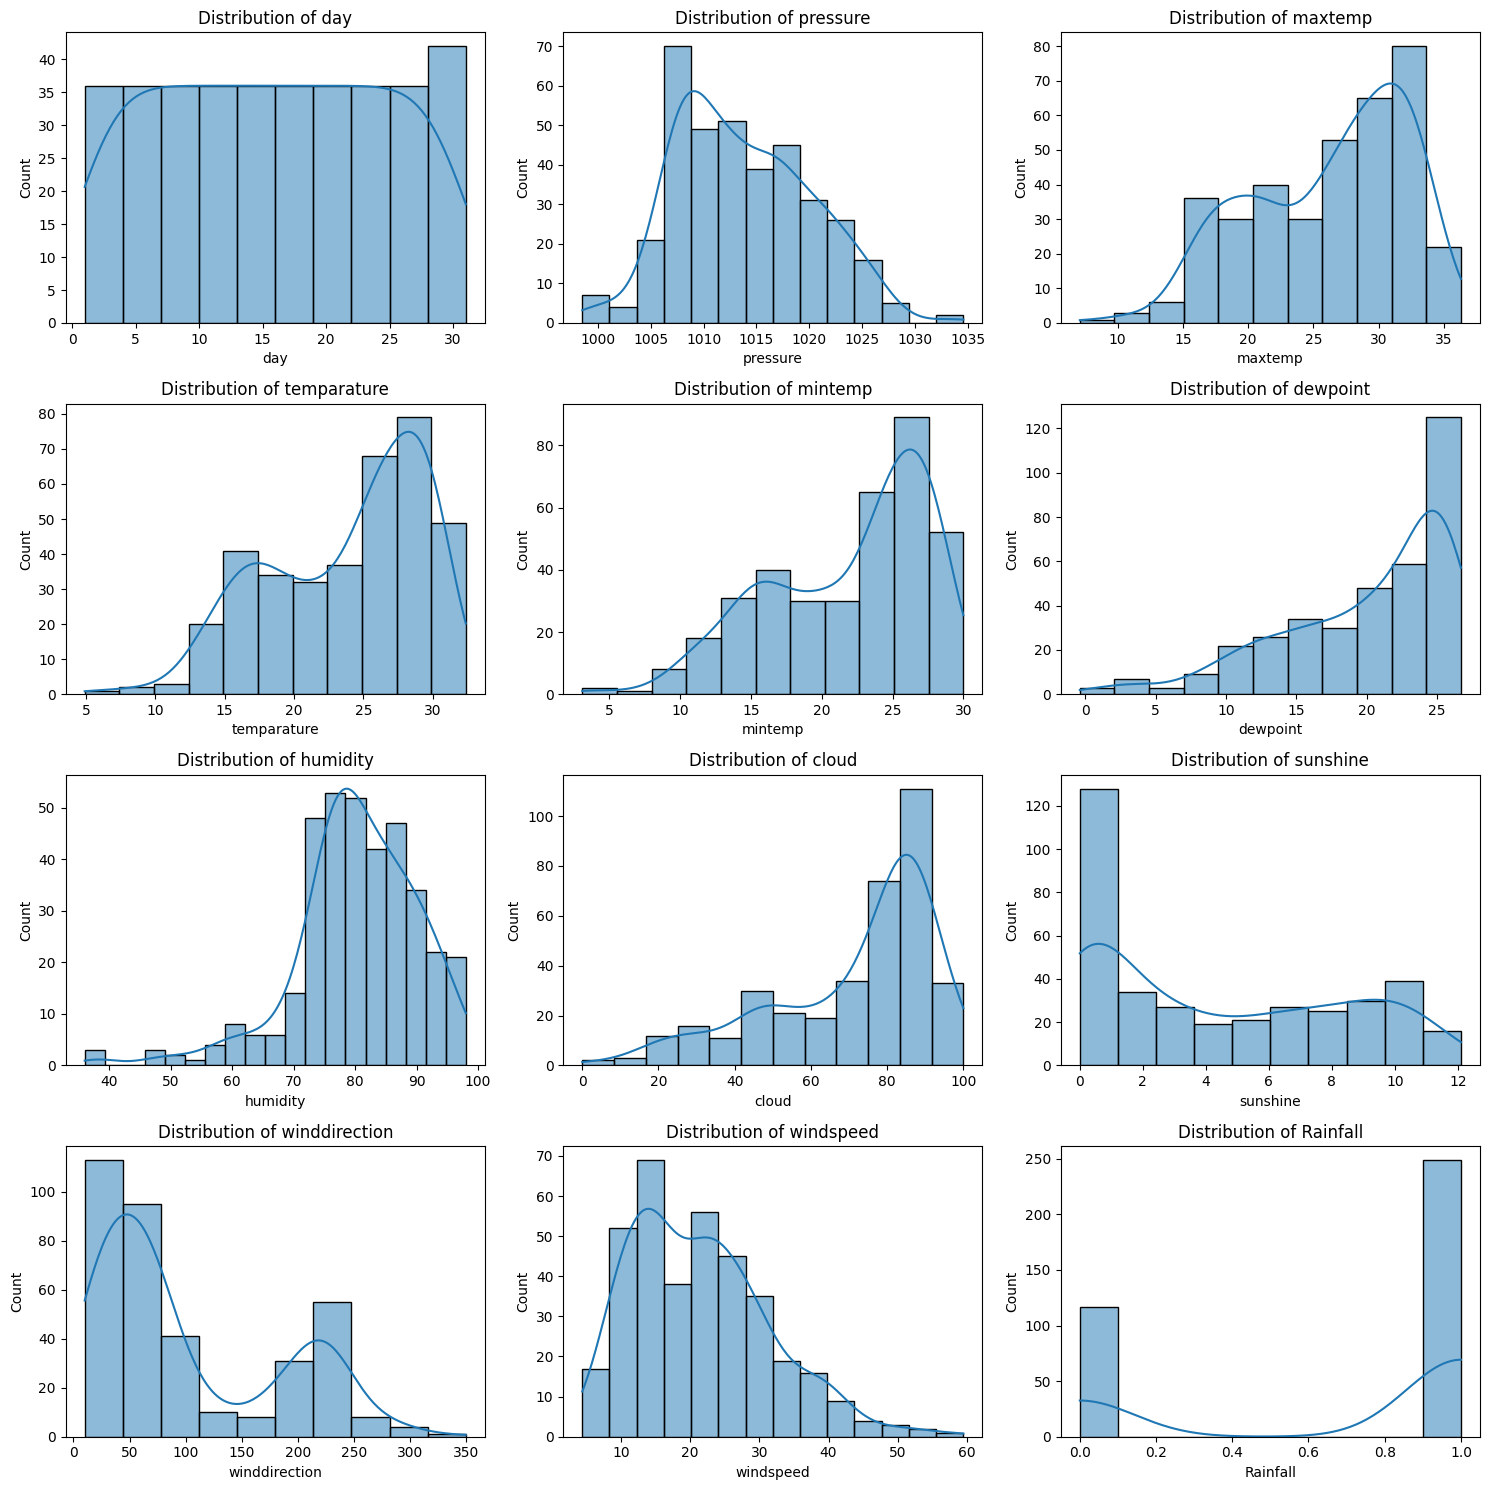

In [22]:
plt.figure(figsize=(15,15))

for i, column in enumerate(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'Rainfall'], 1):
    plt.subplot(4,3,i)
    sns.histplot(data[column], kde = True)
    plt.title(f"Distribution of {column}")
    
plt.tight_layout()    
plt.show()

In [23]:
data.drop(["temparature", "mintemp"], axis=1,  inplace=True)

In [24]:
X = data.iloc[:, 0:-1]
y = data["Rainfall"]

In [25]:
X.head()

,day,pressure,maxtemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1,1025.9,19.9,13.1,72,49,9.3,80.0,26.3
1,2,1022.0,21.7,15.6,81,83,0.6,50.0,15.3
2,3,1019.7,20.3,18.4,95,91,0.0,40.0,14.2
3,4,1018.9,22.3,18.8,90,88,1.0,50.0,16.9
4,5,1015.9,21.3,19.9,95,81,0.0,40.0,13.7


In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
param_grid = {'n_estimators': [100, 300, 500],
              'max_features': ['log2', 'sqrt'],
              'max_depth': [10, 20, 30, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
              }

In [29]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
n_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in n_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    rfc.fit(X_train, y_train)
    
    rfc_pred = rfc.predict(X_test)
    rfc_score = rfc.score(X_test, y_test)
    print(f"Random Forest Classifier Score: {rfc_score:.4f}")

Random Forest Classifier Score: 0.8378
Random Forest Classifier Score: 0.7808
Random Forest Classifier Score: 0.8356
Random Forest Classifier Score: 0.8082
Random Forest Classifier Score: 0.7397


In [30]:
#xgb = XGBClassifier(learning_rate=0.001, n_estimators=100, max_depth=5, random_state=42)
rfc = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator= rfc, param_grid=param_grid,cv= 5, scoring ='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=2)

In [31]:
best_model_grid = grid_search_rf.best_estimator_
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [32]:
score_grid = grid_search_rf.best_score_
print(f"Best score from Grid Search: {score_grid}")

Best score from Grid Search: 0.8019871420222092


In [33]:
score_grid = cross_val_score(best_model_grid, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated score: {score_grid}")
score_grid.mean()

Cross-validated score: [0.81355932 0.74576271 0.86440678 0.79310345 0.79310345]


np.float64(0.8019871420222092)

In [34]:
randomized_rf = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_iter= 20, cv =5, scoring="accuracy", verbose=2, n_jobs =-1)
randomized_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='accuracy', verbose=2)

In [35]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
n_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in n_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    rfc.fit(X_train, y_train)
    
    rfc_pred = rfc.predict(X_test)
    rfc_score = rfc.score(X_test, y_test)
    print(f"Random Forest Classifier Score: {rfc_score:.4f}")

Random Forest Classifier Score: 0.8378
Random Forest Classifier Score: 0.7808
Random Forest Classifier Score: 0.8356
Random Forest Classifier Score: 0.8082
Random Forest Classifier Score: 0.7397


In [36]:
n_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rfc, X, y, cv=n_fold)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean():.4f}")

Cross-Validation Scores: [0.83783784 0.78082192 0.83561644 0.80821918 0.73972603]
Mean Cross-Validation Score: 0.8004


In [38]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# y_pred_xgb = xgb.predict(X_test)

In [39]:
y_pred_rfc = rfc.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report

In [41]:
print(classification_report(y_test,y_pred_xgb))

NameError: name 'y_pred_xgb' is not defined

In [42]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56        24
           1       0.78      0.86      0.82        49

    accuracy                           0.74        73
   macro avg       0.70      0.68      0.69        73
weighted avg       0.73      0.74      0.73        73



In [43]:
input = [3, 1050.0, 20.0, 14.1, 50, 50, 3.4,30.0, 30.0]

a = np.reshape(input, shape=(1,-1))

In [44]:
a

array([[   3. , 1050. ,   20. ,   14.1,   50. ,   50. ,    3.4,   30. ,
          30. ]])

In [46]:
# pred = xgb.predict(a)
# pred

In [48]:
# pred = xgb.predict(a)
# print("Prediction result:", "Rainfall" if pred[0] == 1 else "No Rainfall")

In [49]:
pred = rfc.predict(a)
print("Prediction result:", "Rainfall" if pred[0] == 1 else "No Rainfall")

Prediction result: No Rainfall


c:\Users\abdul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
import pickle

model = {"model": rfc, "feature_names": X.columns.to_list()}

with open("c:\\Users\\abdul\\Downloads\\rainfall_prediction.pkl", "wb") as file:
    pickle.dump(model,file)

In [51]:
pd.to_pickle(rfc, "rainfall_pred.pkl")

In [52]:
filename = "c:\\Users\\abdul\\Downloads\\rainfall_prediction.pkl"
with open(filename, "rb") as file:
    loaded_model = pickle.load(file)

In [54]:
import os
os.getcwd()

'c:\\Users\\abdul\\OneDrive\\Documents'

In [ ]:
import joblib

In [53]:
joblib.dump(rfc, "rainfall_prediction")

['rainfall_prediction']